In [18]:
import yfinance as yf
import pandas as pd
import time
from datetime import date

# Fetch data using Ticker objects for better reliability
print("데이터 다운로드 중...")

# 종료일 명시 (오늘 날짜)
end_date = date.today()
print(f"데이터 수집 기간: 2020-01-01 ~ {end_date}")

sp_ticker = yf.Ticker('^GSPC')
sp = sp_ticker.history(start='2020-01-01', end=end_date)
time.sleep(0.5)

dija_ticker = yf.Ticker('^DJI')
dija = dija_ticker.history(start='2020-01-01', end=end_date)
time.sleep(0.5)

nasdaq_ticker = yf.Ticker('^IXIC')
nasdaq = nasdaq_ticker.history(start='2020-01-01', end=end_date)
time.sleep(0.5)

kospi_ticker = yf.Ticker('^KS11')
kospi = kospi_ticker.history(start='2020-01-01', end=end_date)
time.sleep(0.5)

kosdap_ticker = yf.Ticker('^KQ11')
kosdap = kosdap_ticker.history(start='2020-01-01', end=end_date)

print("다운로드 완료!")
print(f"SP500 데이터 기간: {sp.index.min()} ~ {sp.index.max()}")
print(sp.tail())


데이터 다운로드 중...
데이터 수집 기간: 2020-01-01 ~ 2025-06-30
다운로드 완료!
SP500 데이터 기간: 2020-01-02 00:00:00-05:00 ~ 2025-06-27 00:00:00-04:00
                                  Open         High  ...  Dividends  Stock Splits
Date                                                 ...                         
2025-06-23 00:00:00-04:00  5969.669922  6028.770020  ...        0.0           0.0
2025-06-24 00:00:00-04:00  6061.209961  6101.759766  ...        0.0           0.0
2025-06-25 00:00:00-04:00  6104.229980  6108.509766  ...        0.0           0.0
2025-06-26 00:00:00-04:00  6112.089844  6146.520020  ...        0.0           0.0
2025-06-27 00:00:00-04:00  6150.700195  6187.680176  ...        0.0           0.0

[5 rows x 7 columns]


In [57]:
import pandas as pd
df_pre = pd.DataFrame({
    'S&P 500': sp['Close'], 'SP_Volume': sp['Volume'], 'SP_d': sp['Close'] - sp['Open'],
    '다우존스': dija['Close'], 'DJ_Volume': dija['Volume'], 'DJ_d': dija['Close'] - dija['Open'],
    '나스닥': nasdaq['Close'], 'NA_Volume': nasdaq['Volume'], 'NA_d': nasdaq['Close'] - nasdaq['Open'],
    '코스피': kospi['Close'],
    '코스닥': kosdap['Close']
})
# 1) 타임존 제거 (naive로)
df_pre.index = df_pre.index.tz_localize(None)

# 2) 시간 성분을 00:00:00으로 통일
df_pre.index = df_pre.index.normalize()
# 첫 번째 행만 남기기
df_pre = df_pre[~df_pre.index.duplicated(keep='first')]
df_pre.head

<bound method NDFrame.head of                 S&P 500     SP_Volume  ...          코스피         코스닥
Date                                   ...                         
2020-01-01          NaN           NaN  ...  2175.169922  674.020020
2020-01-02  3257.850098  3.459930e+09  ...          NaN         NaN
2020-01-03  3234.850098  3.484700e+09  ...          NaN         NaN
2020-01-05          NaN           NaN  ...  2155.070068  655.309998
2020-01-06  3246.280029  3.702460e+09  ...          NaN         NaN
...                 ...           ...  ...          ...         ...
2025-06-23  6025.169922  5.597000e+09  ...          NaN         NaN
2025-06-24  6092.180176  5.443690e+09  ...          NaN         NaN
2025-06-25  6092.160156  5.171110e+09  ...          NaN         NaN
2025-06-26  6141.020020  5.308140e+09  ...          NaN         NaN
2025-06-27  6173.069824  7.889350e+09  ...          NaN         NaN

[1681 rows x 11 columns]>

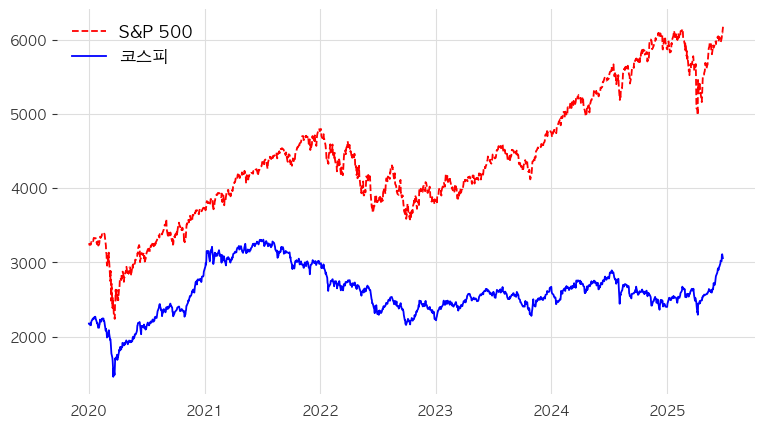

In [58]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as ply
import matplotlib.font_manager as fm
plt.rc('font', family='AppleGothic')  # macOS에서 한글 폰트 설정
plt.figure(figsize=(9, 5))
plt.plot(sp.index, sp.Close, 'r--', label='S&P 500')
plt.plot(kospi.index, kospi.Close, 'b', label='코스피')
plt.grid(True)
plt.legend(loc='best')
plt.show()

In [ ]:
# Darts에서는 결측된 날짜가 없어야 함
from darts import TimeSeries
from darts.dataprocessing.transformers import MissingValuesFiller
series_na = TimeSeries.from_dataframe(df_pre, fill_missing_dates=True, freq='D')
transformer = MissingValuesFiller()
series = transformer.transform(series_na)
# Dart 0.24+에서는  pd_dataframe() 대신 to_dataframe() 메서드가 필요
series = series.to_dataframe()
print(series.isna().sum())

component
S&P 500      0
SP_Volume    0
SP_d         0
다우존스         0
DJ_Volume    0
DJ_d         0
나스닥          0
NA_Volume    0
NA_d         0
코스피          0
코스닥          0
dtype: int64
